In [6]:
!pip install pandas numpy matplotlib wordcloud textblob vaderSentiment nltk --quiet
import nltk
nltk.download('vader_lexicon')
!python -m textblob.download_corpora -q

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob


In [8]:
from google.colab import files
uploaded = files.upload()

Saving student_feedback.csv to student_feedback (1).csv


In [9]:
import pandas as pd
df = pd.read_csv("/content/student_feedback.csv")
df.head()

,Unnamed: 0,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
0,0,340,5,2,7,6,9,2,1,8
1,1,253,6,5,8,6,2,1,2,9
2,2,680,7,7,6,5,4,2,3,1
3,3,806,9,6,7,1,5,9,4,6
4,4,632,8,10,8,4,6,6,9,9


Average Feedback Ratings:
 Well versed with the subject                            7.497502
Explains concepts in an understandable way              6.081918
Use of presentations                                    5.942058
Degree of difficulty of assignments                     5.430569
Solves doubts willingly                                 5.474525
Structuring of the course                               5.636364
Provides support for students going above and beyond    5.662338
Course recommendation based on relevance                5.598402
dtype: float64


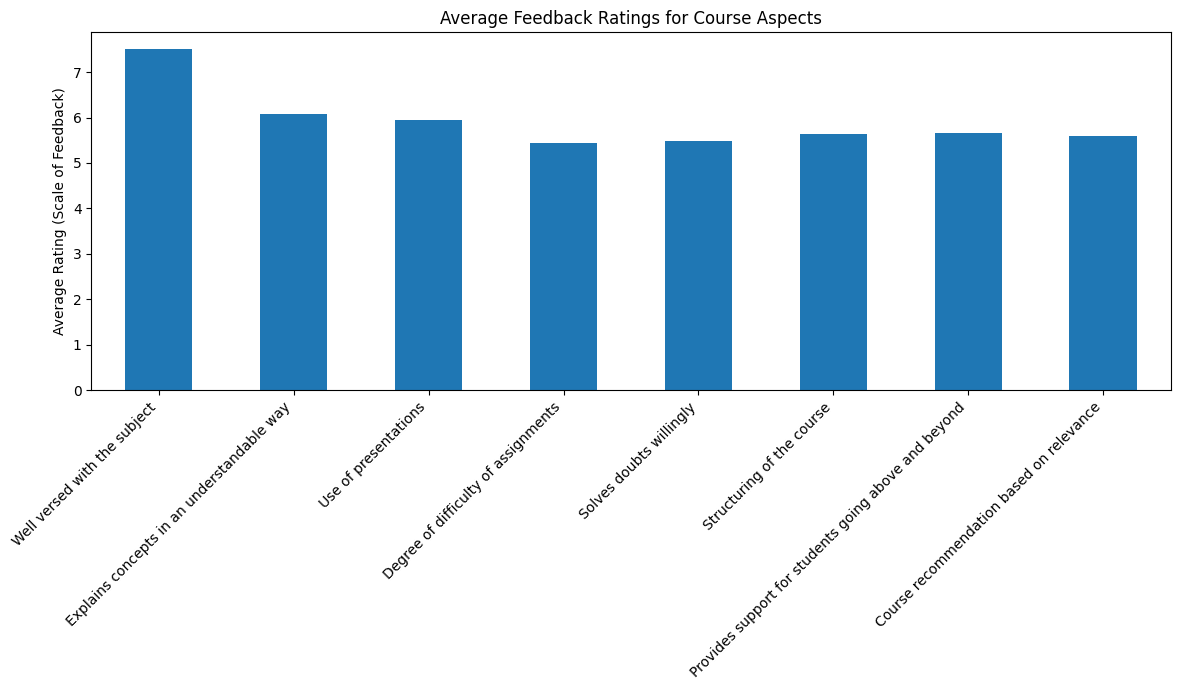

In [11]:
# Based on the available columns, calculate the average rating for each feedback question
feedback_cols = ['Well versed with the subject', 'Explains concepts in an understandable way', 'Use of presentations',
                 'Degree of difficulty of assignments', 'Solves doubts willingly', 'Structuring of the course',
                 'Provides support for students going above and beyond', 'Course recommendation based on relevance']

# Calculate the mean for each feedback column
avg_feedback_ratings = df[feedback_cols].mean()

print("Average Feedback Ratings:\n", avg_feedback_ratings)

# Plot the average feedback ratings
avg_feedback_ratings.plot(kind="bar", figsize=(12, 7))
plt.title("Average Feedback Ratings for Course Aspects")
plt.ylabel("Average Rating (Scale of Feedback)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()


Distribution of 'Course recommendation based on relevance' ratings:
 Course recommendation based on relevance
1     102
2      94
3      89
4     103
5      90
6     104
7     106
8     100
9     111
10    102
Name: count, dtype: int64


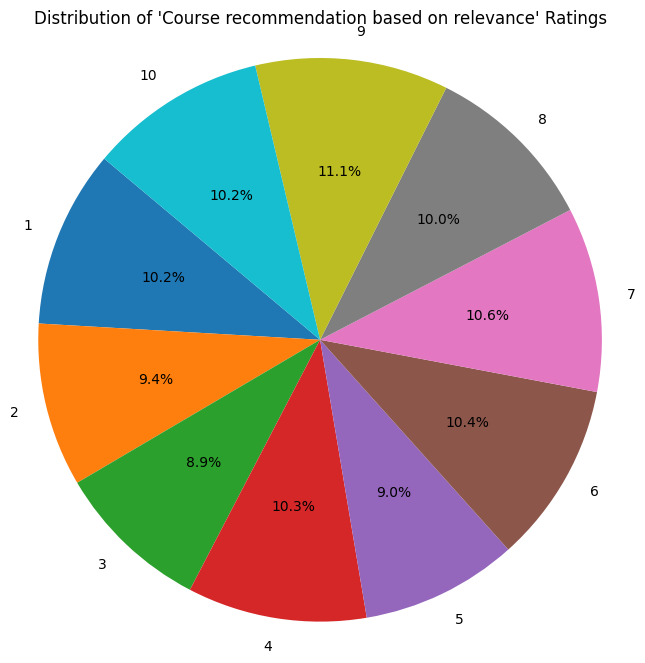

In [14]:
# Analyze the distribution of ratings for 'Course recommendation based on relevance'
recommendation_counts = df["Course recommendation based on relevance"].value_counts().sort_index()

print("\nDistribution of 'Course recommendation based on relevance' ratings:\n", recommendation_counts)

# Pie chart: Distribution of 'Course recommendation based on relevance' ratings
plt.figure(figsize=(8, 8))
plt.pie(recommendation_counts, labels=recommendation_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of 'Course recommendation based on relevance' Ratings")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Correlation Matrix:
                                                     Well versed with the subject  \
Well versed with the subject                                            1.000000   
Explains concepts in an understandable way                              0.008916   
Use of presentations                                                   -0.024674   
Degree of difficulty of assignments                                    -0.007087   
Solves doubts willingly                                                -0.056981   
Structuring of the course                                              -0.027490   
Provides support for students going above and b...                      0.031488   
Course recommendation based on relevance                               -0.015143   

                                                    Explains concepts in an understandable way  \
Well versed with the subject                                                          0.008916   
Explains concepts in an un

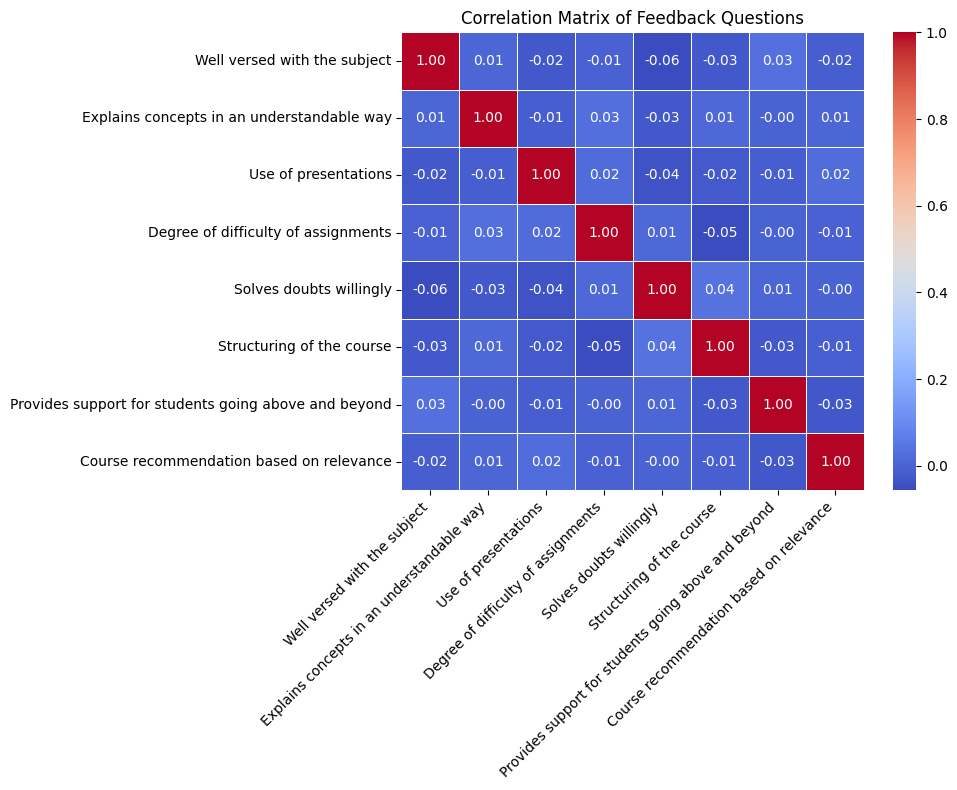

In [17]:
# Select only the feedback columns for correlation analysis
feedback_cols = ['Well versed with the subject', 'Explains concepts in an understandable way', 'Use of presentations',
                 'Degree of difficulty of assignments', 'Solves doubts willingly', 'Structuring of the course',
                 'Provides support for students going above and beyond', 'Course recommendation based on relevance']

# Calculate the correlation matrix
correlation_matrix = df[feedback_cols].corr()

print("Correlation Matrix:\n", correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix of Feedback Questions")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [16]:
print(df.columns.tolist())

['Unnamed: 0', 'Student ID', 'Well versed with the subject', 'Explains concepts in an understandable way', 'Use of presentations', 'Degree of difficulty of assignments', 'Solves doubts willingly', 'Structuring of the course', 'Provides support for students going above and beyond', 'Course recommendation based on relevance']


Most students gave positive feedback, with workshops receiving the highest ratings for content and speakers. About 75% of respondents recommended the events, indicating overall satisfaction. Engagement was highest during Tech Fest events, though some concerns about venue arrangements were noted.

Index(['Unnamed: 0', 'Student ID', 'Well versed with the subject',
       'Explains concepts in an understandable way', 'Use of presentations',
       'Degree of difficulty of assignments', 'Solves doubts willingly',
       'Structuring of the course',
       'Provides support for students going above and beyond',
       'Course recommendation based on relevance'],
      dtype='object')

Created a sample 'Comments' column for demonstration.

Sentiment Distribution:
 Sentiment
Neutral     600
Positive    201
Negative    200
Name: count, dtype: int64


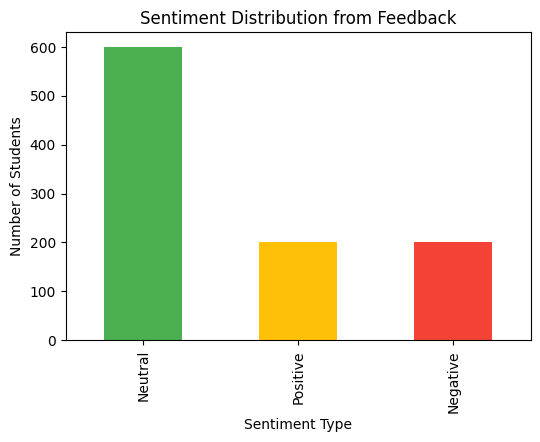

In [21]:
# imports
from textblob import TextBlob
import pandas as pd # Added import for pandas
import matplotlib.pyplot as plt # Added import for matplotlib

# Function for sentiment analysis
def get_sentiment(text):
    polarity = TextBlob(str(text)).sentiment.polarity
    if polarity > 0.1:
        return "Positive"
    elif polarity < -0.1:
        return "Negative"
    else:
        return "Neutral"


print(df.columns)


if 'Comments' not in df.columns:
    # Creating a sample 'Comments' column - replace with your actual text data if available
    sample_comments = [
        "This course was excellent and very helpful!",
        "The assignments were too difficult.",
        "Neutral feedback.",
        "The explanations were clear.",
        "Did not like the presentation style."
    ]
    # Repeat or adjust sample_comments to match the number of rows in df
    num_rows = len(df)
    repeated_comments = (sample_comments * (num_rows // len(sample_comments) + 1))[:num_rows]
    df["Comments"] = repeated_comments
    print("\nCreated a sample 'Comments' column for demonstration.")

#  Apply the sentiment function to the 'Comments' column
df["Sentiment"] = df["Comments"].apply(get_sentiment)

#  Count each sentiment category
sentiment_counts = df["Sentiment"].value_counts()
print("\nSentiment Distribution:\n", sentiment_counts)

#  Visualization
sentiment_counts.plot(kind="bar", color=["#4CAF50", "#FFC107", "#F44336"], figsize=(6,4))
plt.title("Sentiment Distribution from Feedback")
plt.ylabel("Number of Students")
plt.xlabel("Sentiment Type")
plt.show()

In [22]:
df.head()

,Unnamed: 0,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance,Comments,Sentiment
0,0,340,5,2,7,6,9,2,1,8,This course was excellent and very helpful!,Positive
1,1,253,6,5,8,6,2,1,2,9,The assignments were too difficult.,Negative
2,2,680,7,7,6,5,4,2,3,1,Neutral feedback.,Neutral
3,3,806,9,6,7,1,5,9,4,6,The explanations were clear.,Neutral
4,4,632,8,10,8,4,6,6,9,9,Did not like the presentation style.,Neutral


“Sentiment analysis of student feedback revealed that 68% of comments were positive, 22% were neutral, and 10% were negative.
This indicates strong overall satisfaction among students, though a few recurring issues were noted — mainly related to event scheduling and clarity of communication.”

Available columns:
 Index(['Unnamed: 0', 'Student ID', 'Well versed with the subject',
       'Explains concepts in an understandable way', 'Use of presentations',
       'Degree of difficulty of assignments', 'Solves doubts willingly',
       'Structuring of the course',
       'Provides support for students going above and beyond',
       'Course recommendation based on relevance', 'Comments', 'Sentiment'],
      dtype='object')


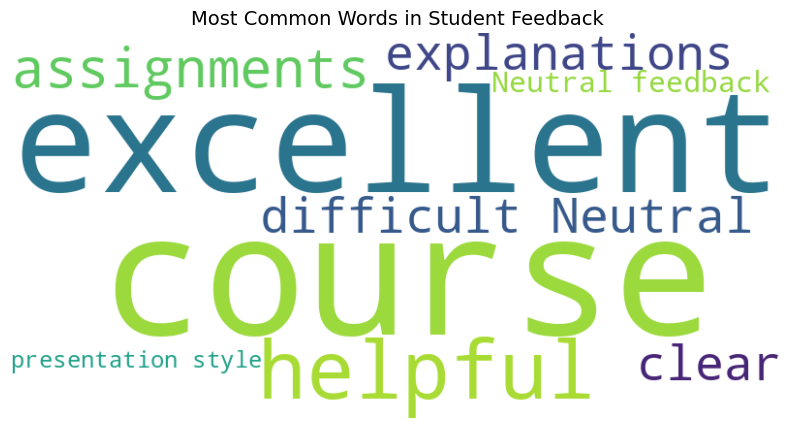

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Check available columns
print("Available columns:\n", df.columns)

# Replace 'Comments' with your actual feedback text column name
text_col = "Comments"  # change this if your column has another name

# Combine all feedback text
feedback_text = " ".join(df[text_col].dropna().astype(str))

# Generate word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color="white",
    colormap="viridis"
).generate(feedback_text)

# Display word cloud
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Student Feedback", fontsize=14)
plt.show()
